In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with np.load('./notMNIST.npz') as data :
    Data, Target = data ["images"], data["labels"]
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data = Data[randIndx]/255.
    Target = Target[randIndx]
    trainData, trainTarget = Data[:15000], Target[:15000]
    validData, validTarget = Data[15000:16000], Target[15000:16000]
    testData, testTarget = Data[16000:], Target[16000:]

In [3]:
trainZeros=np.zeros((15000, 10))
trainZeros[np.arange(15000),trainTarget]=1
trainTarget = trainZeros
validZeros=np.zeros((1000, 10))
validZeros[np.arange(1000),validTarget]=1
validTarget = validZeros
testZeros=np.zeros((2724, 10))
testZeros[np.arange(2724),testTarget]=1
testTarget = testZeros

In [31]:
n_epochs = 5000
batch_size = 1000
n_dim = 28*28

In [32]:
def grab_batches(trainData, trainTarget, batch_size):
    batch_indices = np.random.permutation(range(15000)).reshape(-1, batch_size)
    X_batches = trainData.reshape(-1, n_dim)[batch_indices]
    y_batches = trainTarget[batch_indices]
    batches = zip(X_batches, y_batches)
    return batches

In [33]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,10])
lr = tf.placeholder(tf.float32)
weight_decay = 3e-4

In [34]:
def hidden_layer(X, hidden_units):
    x_dimension = X.shape[1].value
    initializer = tf.contrib.layers.xavier_initializer(uniform=False)
    hidden_weights = tf.Variable(initializer([x_dimension, hidden_units]), name='weights')
    hidden_biases = tf.Variable(tf.zeros(hidden_units), name='biases')
    
    return tf.add(tf.matmul(X, hidden_weights), hidden_biases), hidden_weights

In [35]:
y_, W1 = hidden_layer(X,1000)
y_, W2 = hidden_layer(tf.nn.relu(y_),10)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=y_))
regularizer = (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2)) 
loss = tf.reduce_mean(loss + weight_decay * regularizer)

prediction = tf.cast(tf.round(tf.argmax(y_,1)), tf.int8)
equality = tf.equal(prediction, tf.cast(tf.argmax(Y,1), tf.int8))
accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))

training_step = tf.train.AdamOptimizer(lr).minimize(loss)
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [39]:
learning_rates = 10**np.random.uniform(low=-7, high=-4, size=3)

In [40]:
def plot_metrics(learning_rate):
    for metric in ['loss', 'accuracy']:
        plt.figure(figsize=(12,9))
        plt.title('{} vs. num. of epochs for learning rate of {:.5}'.format(metric, learning_rate))
        for dataset in ['train', 'test', 'valid']:
            plt.plot(range(1, epoch+1), metrics[dataset][metric], label=dataset)
        plt.axvline(x=best_epoch[metric], linewidth=1, linestyle='dashed', color='k', label='early stopping')
        plt.legend()
        plt.savefig('figures/lr_{:.8}_{}.png'.format(learning_rate, metric), dpi=300, bbox_inches='tight')

Learning Rate: 6.80840748267209e-05 

Epoch: 10, Train Loss: 0.5711, Train Accuracy: 0.8889
Best Epoch: {'loss': 10, 'accuracy': 10}, Best Valid Loss: 0.5771, Best Valid Accuracy: 0.89 

Epoch: 20, Train Loss: 0.4872, Train Accuracy: 0.9062
Best Epoch: {'loss': 20, 'accuracy': 18}, Best Valid Loss: 0.4989, Best Valid Accuracy: 0.904 

Epoch: 30, Train Loss: 0.4421, Train Accuracy: 0.9175
Best Epoch: {'loss': 30, 'accuracy': 25}, Best Valid Loss: 0.4635, Best Valid Accuracy: 0.909 

Epoch: 40, Train Loss: 0.4094, Train Accuracy: 0.9273
Best Epoch: {'loss': 39, 'accuracy': 38}, Best Valid Loss: 0.4433, Best Valid Accuracy: 0.916 

Epoch: 50, Train Loss: 0.3816, Train Accuracy: 0.9349
Best Epoch: {'loss': 50, 'accuracy': 48}, Best Valid Loss: 0.4263, Best Valid Accuracy: 0.919 

Epoch: 60, Train Loss: 0.3585, Train Accuracy: 0.9406
Best Epoch: {'loss': 60, 'accuracy': 55}, Best Valid Loss: 0.4152, Best Valid Accuracy: 0.922 

Epoch: 70, Train Loss: 0.3366, Train Accuracy: 0.9467
Best Epoc

Epoch: 550, Train Loss: 0.07578, Train Accuracy: 0.9996
Best Epoch: {'loss': 549, 'accuracy': 321}, Best Valid Loss: 0.3143, Best Valid Accuracy: 0.942 

Epoch: 560, Train Loss: 0.07462, Train Accuracy: 0.9996
Best Epoch: {'loss': 553, 'accuracy': 321}, Best Valid Loss: 0.3126, Best Valid Accuracy: 0.942 

Epoch: 570, Train Loss: 0.07355, Train Accuracy: 0.9996
Best Epoch: {'loss': 568, 'accuracy': 321}, Best Valid Loss: 0.3102, Best Valid Accuracy: 0.942 

Epoch: 580, Train Loss: 0.07302, Train Accuracy: 0.9995
Best Epoch: {'loss': 568, 'accuracy': 321}, Best Valid Loss: 0.3102, Best Valid Accuracy: 0.942 

Epoch: 590, Train Loss: 0.07165, Train Accuracy: 0.9996
Best Epoch: {'loss': 590, 'accuracy': 321}, Best Valid Loss: 0.3098, Best Valid Accuracy: 0.942 

Epoch: 600, Train Loss: 0.07052, Train Accuracy: 0.9996
Best Epoch: {'loss': 596, 'accuracy': 321}, Best Valid Loss: 0.3088, Best Valid Accuracy: 0.942 

Epoch: 610, Train Loss: 0.07004, Train Accuracy: 0.9995
Best Epoch: {'loss':

Epoch: 1090, Train Loss: 0.05593, Train Accuracy: 0.9996
Best Epoch: {'loss': 1064, 'accuracy': 321}, Best Valid Loss: 0.2942, Best Valid Accuracy: 0.942 

Epoch: 1100, Train Loss: 0.05561, Train Accuracy: 0.9996
Best Epoch: {'loss': 1064, 'accuracy': 321}, Best Valid Loss: 0.2942, Best Valid Accuracy: 0.942 

Epoch: 1110, Train Loss: 0.05575, Train Accuracy: 0.9996
Best Epoch: {'loss': 1064, 'accuracy': 321}, Best Valid Loss: 0.2942, Best Valid Accuracy: 0.942 

Epoch: 1120, Train Loss: 0.05587, Train Accuracy: 0.9996
Best Epoch: {'loss': 1064, 'accuracy': 321}, Best Valid Loss: 0.2942, Best Valid Accuracy: 0.942 

Epoch: 1130, Train Loss: 0.05549, Train Accuracy: 0.9996
Best Epoch: {'loss': 1064, 'accuracy': 321}, Best Valid Loss: 0.2942, Best Valid Accuracy: 0.942 

Epoch: 1140, Train Loss: 0.05564, Train Accuracy: 0.9996
Best Epoch: {'loss': 1064, 'accuracy': 321}, Best Valid Loss: 0.2942, Best Valid Accuracy: 0.942 

Epoch: 1150, Train Loss: 0.05567, Train Accuracy: 0.9996
Best Ep

Epoch: 1620, Train Loss: 0.05413, Train Accuracy: 0.9996
Best Epoch: {'loss': 1517, 'accuracy': 321}, Best Valid Loss: 0.2915, Best Valid Accuracy: 0.942 

Epoch: 1630, Train Loss: 0.05396, Train Accuracy: 0.9996
Best Epoch: {'loss': 1628, 'accuracy': 321}, Best Valid Loss: 0.291, Best Valid Accuracy: 0.942 

Epoch: 1640, Train Loss: 0.0537, Train Accuracy: 0.9996
Best Epoch: {'loss': 1628, 'accuracy': 321}, Best Valid Loss: 0.291, Best Valid Accuracy: 0.942 

Epoch: 1650, Train Loss: 0.05382, Train Accuracy: 0.9996
Best Epoch: {'loss': 1628, 'accuracy': 321}, Best Valid Loss: 0.291, Best Valid Accuracy: 0.942 

Epoch: 1660, Train Loss: 0.0537, Train Accuracy: 0.9996
Best Epoch: {'loss': 1628, 'accuracy': 321}, Best Valid Loss: 0.291, Best Valid Accuracy: 0.942 

Epoch: 1670, Train Loss: 0.05411, Train Accuracy: 0.9996
Best Epoch: {'loss': 1628, 'accuracy': 321}, Best Valid Loss: 0.291, Best Valid Accuracy: 0.942 

Epoch: 1680, Train Loss: 0.05385, Train Accuracy: 0.9996
Best Epoch: {'

Epoch: 2150, Train Loss: 0.05293, Train Accuracy: 0.9996
Best Epoch: {'loss': 2123, 'accuracy': 321}, Best Valid Loss: 0.2892, Best Valid Accuracy: 0.942 

Epoch: 2160, Train Loss: 0.05313, Train Accuracy: 0.9996
Best Epoch: {'loss': 2123, 'accuracy': 321}, Best Valid Loss: 0.2892, Best Valid Accuracy: 0.942 

Epoch: 2170, Train Loss: 0.05304, Train Accuracy: 0.9996
Best Epoch: {'loss': 2123, 'accuracy': 321}, Best Valid Loss: 0.2892, Best Valid Accuracy: 0.942 

Epoch: 2180, Train Loss: 0.05319, Train Accuracy: 0.9996
Best Epoch: {'loss': 2123, 'accuracy': 321}, Best Valid Loss: 0.2892, Best Valid Accuracy: 0.942 

Epoch: 2190, Train Loss: 0.05291, Train Accuracy: 0.9996
Best Epoch: {'loss': 2123, 'accuracy': 321}, Best Valid Loss: 0.2892, Best Valid Accuracy: 0.942 

Epoch: 2200, Train Loss: 0.05287, Train Accuracy: 0.9996
Best Epoch: {'loss': 2123, 'accuracy': 321}, Best Valid Loss: 0.2892, Best Valid Accuracy: 0.942 

Epoch: 2210, Train Loss: 0.05288, Train Accuracy: 0.9996
Best Ep

Epoch: 2680, Train Loss: 0.05262, Train Accuracy: 0.9996
Best Epoch: {'loss': 2256, 'accuracy': 2410}, Best Valid Loss: 0.2881, Best Valid Accuracy: 0.943 

Epoch: 2690, Train Loss: 0.05246, Train Accuracy: 0.9996
Best Epoch: {'loss': 2256, 'accuracy': 2410}, Best Valid Loss: 0.2881, Best Valid Accuracy: 0.943 

Epoch: 2700, Train Loss: 0.05237, Train Accuracy: 0.9996
Best Epoch: {'loss': 2256, 'accuracy': 2410}, Best Valid Loss: 0.2881, Best Valid Accuracy: 0.943 

Epoch: 2710, Train Loss: 0.05271, Train Accuracy: 0.9996
Best Epoch: {'loss': 2256, 'accuracy': 2410}, Best Valid Loss: 0.2881, Best Valid Accuracy: 0.943 

Epoch: 2720, Train Loss: 0.05256, Train Accuracy: 0.9996
Best Epoch: {'loss': 2256, 'accuracy': 2410}, Best Valid Loss: 0.2881, Best Valid Accuracy: 0.943 

Epoch: 2730, Train Loss: 0.05263, Train Accuracy: 0.9996
Best Epoch: {'loss': 2256, 'accuracy': 2410}, Best Valid Loss: 0.2881, Best Valid Accuracy: 0.943 

Epoch: 2740, Train Loss: 0.05232, Train Accuracy: 0.9996
B

Epoch: 3210, Train Loss: 0.05218, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3220, Train Loss: 0.05223, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3230, Train Loss: 0.0524, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3240, Train Loss: 0.05217, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3250, Train Loss: 0.05199, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3260, Train Loss: 0.05217, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3270, Train Loss: 0.0521, Train Accuracy: 0.9996
Best Epoc

Epoch: 3740, Train Loss: 0.05182, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3750, Train Loss: 0.05186, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3760, Train Loss: 0.05192, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3770, Train Loss: 0.0518, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3780, Train Loss: 0.05212, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3790, Train Loss: 0.05218, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 3800, Train Loss: 0.05181, Train Accuracy: 0.9996
Best Epo

Epoch: 4270, Train Loss: 0.05161, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4280, Train Loss: 0.05178, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4290, Train Loss: 0.05162, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4300, Train Loss: 0.0517, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4310, Train Loss: 0.05151, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4320, Train Loss: 0.05148, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4330, Train Loss: 0.05164, Train Accuracy: 0.9996
Best Epo

Epoch: 4800, Train Loss: 0.05145, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4810, Train Loss: 0.0514, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4820, Train Loss: 0.05132, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4830, Train Loss: 0.05176, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4840, Train Loss: 0.05141, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4850, Train Loss: 0.05137, Train Accuracy: 0.9996
Best Epoch: {'loss': 3143, 'accuracy': 2410}, Best Valid Loss: 0.287, Best Valid Accuracy: 0.943 

Epoch: 4860, Train Loss: 0.05142, Train Accuracy: 0.9996
Best Epo

Epoch: 340, Train Loss: 1.28, Train Accuracy: 0.8029
Best Epoch: {'loss': 340, 'accuracy': 339}, Best Valid Loss: 1.294, Best Valid Accuracy: 0.792 

Epoch: 350, Train Loss: 1.258, Train Accuracy: 0.8072
Best Epoch: {'loss': 350, 'accuracy': 348}, Best Valid Loss: 1.271, Best Valid Accuracy: 0.794 

Epoch: 360, Train Loss: 1.237, Train Accuracy: 0.8108
Best Epoch: {'loss': 360, 'accuracy': 360}, Best Valid Loss: 1.25, Best Valid Accuracy: 0.798 

Epoch: 370, Train Loss: 1.216, Train Accuracy: 0.8134
Best Epoch: {'loss': 370, 'accuracy': 370}, Best Valid Loss: 1.229, Best Valid Accuracy: 0.803 

Epoch: 380, Train Loss: 1.196, Train Accuracy: 0.8165
Best Epoch: {'loss': 380, 'accuracy': 379}, Best Valid Loss: 1.209, Best Valid Accuracy: 0.808 

Epoch: 390, Train Loss: 1.176, Train Accuracy: 0.8195
Best Epoch: {'loss': 390, 'accuracy': 383}, Best Valid Loss: 1.19, Best Valid Accuracy: 0.811 

Epoch: 400, Train Loss: 1.158, Train Accuracy: 0.8219
Best Epoch: {'loss': 400, 'accuracy': 400},

Epoch: 880, Train Loss: 0.7015, Train Accuracy: 0.8679
Best Epoch: {'loss': 880, 'accuracy': 846}, Best Valid Loss: 0.7066, Best Valid Accuracy: 0.872 

Epoch: 890, Train Loss: 0.6974, Train Accuracy: 0.8683
Best Epoch: {'loss': 890, 'accuracy': 846}, Best Valid Loss: 0.7023, Best Valid Accuracy: 0.872 

Epoch: 900, Train Loss: 0.6933, Train Accuracy: 0.8689
Best Epoch: {'loss': 900, 'accuracy': 846}, Best Valid Loss: 0.6981, Best Valid Accuracy: 0.872 

Epoch: 910, Train Loss: 0.6894, Train Accuracy: 0.8691
Best Epoch: {'loss': 910, 'accuracy': 846}, Best Valid Loss: 0.694, Best Valid Accuracy: 0.872 

Epoch: 920, Train Loss: 0.6855, Train Accuracy: 0.8696
Best Epoch: {'loss': 920, 'accuracy': 846}, Best Valid Loss: 0.6901, Best Valid Accuracy: 0.872 

Epoch: 930, Train Loss: 0.6818, Train Accuracy: 0.8701
Best Epoch: {'loss': 930, 'accuracy': 846}, Best Valid Loss: 0.6862, Best Valid Accuracy: 0.872 

Epoch: 940, Train Loss: 0.6781, Train Accuracy: 0.8704
Best Epoch: {'loss': 940, 'a

Epoch: 1410, Train Loss: 0.5737, Train Accuracy: 0.8868
Best Epoch: {'loss': 1410, 'accuracy': 1383}, Best Valid Loss: 0.5752, Best Valid Accuracy: 0.892 

Epoch: 1420, Train Loss: 0.5723, Train Accuracy: 0.887
Best Epoch: {'loss': 1420, 'accuracy': 1383}, Best Valid Loss: 0.5739, Best Valid Accuracy: 0.892 

Epoch: 1430, Train Loss: 0.571, Train Accuracy: 0.8873
Best Epoch: {'loss': 1430, 'accuracy': 1383}, Best Valid Loss: 0.5725, Best Valid Accuracy: 0.892 

Epoch: 1440, Train Loss: 0.5697, Train Accuracy: 0.8873
Best Epoch: {'loss': 1440, 'accuracy': 1383}, Best Valid Loss: 0.5712, Best Valid Accuracy: 0.892 

Epoch: 1450, Train Loss: 0.5684, Train Accuracy: 0.8875
Best Epoch: {'loss': 1450, 'accuracy': 1383}, Best Valid Loss: 0.5699, Best Valid Accuracy: 0.892 

Epoch: 1460, Train Loss: 0.5671, Train Accuracy: 0.8881
Best Epoch: {'loss': 1460, 'accuracy': 1383}, Best Valid Loss: 0.5686, Best Valid Accuracy: 0.892 

Epoch: 1470, Train Loss: 0.5659, Train Accuracy: 0.8882
Best Epoch

Epoch: 1940, Train Loss: 0.5219, Train Accuracy: 0.8962
Best Epoch: {'loss': 1940, 'accuracy': 1937}, Best Valid Loss: 0.5237, Best Valid Accuracy: 0.899 

Epoch: 1950, Train Loss: 0.5212, Train Accuracy: 0.8964
Best Epoch: {'loss': 1950, 'accuracy': 1937}, Best Valid Loss: 0.5231, Best Valid Accuracy: 0.899 

Epoch: 1960, Train Loss: 0.5205, Train Accuracy: 0.8967
Best Epoch: {'loss': 1960, 'accuracy': 1937}, Best Valid Loss: 0.5224, Best Valid Accuracy: 0.899 

Epoch: 1970, Train Loss: 0.5198, Train Accuracy: 0.8967
Best Epoch: {'loss': 1970, 'accuracy': 1937}, Best Valid Loss: 0.5217, Best Valid Accuracy: 0.899 

Epoch: 1980, Train Loss: 0.5191, Train Accuracy: 0.8971
Best Epoch: {'loss': 1980, 'accuracy': 1937}, Best Valid Loss: 0.5211, Best Valid Accuracy: 0.899 

Epoch: 1990, Train Loss: 0.5184, Train Accuracy: 0.8973
Best Epoch: {'loss': 1990, 'accuracy': 1937}, Best Valid Loss: 0.5204, Best Valid Accuracy: 0.899 

Epoch: 2000, Train Loss: 0.5177, Train Accuracy: 0.8975
Best Epo

Epoch: 2470, Train Loss: 0.491, Train Accuracy: 0.9033
Best Epoch: {'loss': 2470, 'accuracy': 2402}, Best Valid Loss: 0.4958, Best Valid Accuracy: 0.902 

Epoch: 2480, Train Loss: 0.4905, Train Accuracy: 0.9035
Best Epoch: {'loss': 2480, 'accuracy': 2402}, Best Valid Loss: 0.4954, Best Valid Accuracy: 0.902 

Epoch: 2490, Train Loss: 0.49, Train Accuracy: 0.9037
Best Epoch: {'loss': 2490, 'accuracy': 2402}, Best Valid Loss: 0.495, Best Valid Accuracy: 0.902 

Epoch: 2500, Train Loss: 0.4895, Train Accuracy: 0.9037
Best Epoch: {'loss': 2500, 'accuracy': 2402}, Best Valid Loss: 0.4946, Best Valid Accuracy: 0.902 

Epoch: 2510, Train Loss: 0.4891, Train Accuracy: 0.9038
Best Epoch: {'loss': 2510, 'accuracy': 2402}, Best Valid Loss: 0.4942, Best Valid Accuracy: 0.902 

Epoch: 2520, Train Loss: 0.4886, Train Accuracy: 0.904
Best Epoch: {'loss': 2520, 'accuracy': 2402}, Best Valid Loss: 0.4938, Best Valid Accuracy: 0.902 

Epoch: 2530, Train Loss: 0.4881, Train Accuracy: 0.9043
Best Epoch: {

Epoch: 3000, Train Loss: 0.4686, Train Accuracy: 0.9098
Best Epoch: {'loss': 3000, 'accuracy': 2876}, Best Valid Loss: 0.4778, Best Valid Accuracy: 0.903 

Epoch: 3010, Train Loss: 0.4682, Train Accuracy: 0.9099
Best Epoch: {'loss': 3010, 'accuracy': 3007}, Best Valid Loss: 0.4775, Best Valid Accuracy: 0.904 

Epoch: 3020, Train Loss: 0.4678, Train Accuracy: 0.91
Best Epoch: {'loss': 3020, 'accuracy': 3012}, Best Valid Loss: 0.4772, Best Valid Accuracy: 0.905 

Epoch: 3030, Train Loss: 0.4674, Train Accuracy: 0.9101
Best Epoch: {'loss': 3030, 'accuracy': 3024}, Best Valid Loss: 0.477, Best Valid Accuracy: 0.906 

Epoch: 3040, Train Loss: 0.4671, Train Accuracy: 0.9103
Best Epoch: {'loss': 3040, 'accuracy': 3024}, Best Valid Loss: 0.4767, Best Valid Accuracy: 0.906 

Epoch: 3050, Train Loss: 0.4667, Train Accuracy: 0.9103
Best Epoch: {'loss': 3050, 'accuracy': 3024}, Best Valid Loss: 0.4764, Best Valid Accuracy: 0.906 

Epoch: 3060, Train Loss: 0.4663, Train Accuracy: 0.9103
Best Epoch:

Epoch: 3530, Train Loss: 0.4506, Train Accuracy: 0.9151
Best Epoch: {'loss': 3530, 'accuracy': 3266}, Best Valid Loss: 0.4649, Best Valid Accuracy: 0.907 

Epoch: 3540, Train Loss: 0.4503, Train Accuracy: 0.915
Best Epoch: {'loss': 3540, 'accuracy': 3266}, Best Valid Loss: 0.4646, Best Valid Accuracy: 0.907 

Epoch: 3550, Train Loss: 0.45, Train Accuracy: 0.9151
Best Epoch: {'loss': 3549, 'accuracy': 3266}, Best Valid Loss: 0.4644, Best Valid Accuracy: 0.907 

Epoch: 3560, Train Loss: 0.4497, Train Accuracy: 0.9152
Best Epoch: {'loss': 3560, 'accuracy': 3266}, Best Valid Loss: 0.4642, Best Valid Accuracy: 0.907 

Epoch: 3570, Train Loss: 0.4494, Train Accuracy: 0.9151
Best Epoch: {'loss': 3570, 'accuracy': 3266}, Best Valid Loss: 0.464, Best Valid Accuracy: 0.907 

Epoch: 3580, Train Loss: 0.4491, Train Accuracy: 0.9155
Best Epoch: {'loss': 3580, 'accuracy': 3266}, Best Valid Loss: 0.4638, Best Valid Accuracy: 0.907 

Epoch: 3590, Train Loss: 0.4488, Train Accuracy: 0.9157
Best Epoch: 

Epoch: 4060, Train Loss: 0.4354, Train Accuracy: 0.9194
Best Epoch: {'loss': 4060, 'accuracy': 4007}, Best Valid Loss: 0.4547, Best Valid Accuracy: 0.911 

Epoch: 4070, Train Loss: 0.4351, Train Accuracy: 0.9195
Best Epoch: {'loss': 4070, 'accuracy': 4007}, Best Valid Loss: 0.4545, Best Valid Accuracy: 0.911 

Epoch: 4080, Train Loss: 0.4348, Train Accuracy: 0.9196
Best Epoch: {'loss': 4080, 'accuracy': 4007}, Best Valid Loss: 0.4543, Best Valid Accuracy: 0.911 

Epoch: 4090, Train Loss: 0.4346, Train Accuracy: 0.9197
Best Epoch: {'loss': 4090, 'accuracy': 4007}, Best Valid Loss: 0.4542, Best Valid Accuracy: 0.911 

Epoch: 4100, Train Loss: 0.4343, Train Accuracy: 0.9199
Best Epoch: {'loss': 4100, 'accuracy': 4007}, Best Valid Loss: 0.454, Best Valid Accuracy: 0.911 

Epoch: 4110, Train Loss: 0.4341, Train Accuracy: 0.9199
Best Epoch: {'loss': 4110, 'accuracy': 4007}, Best Valid Loss: 0.4538, Best Valid Accuracy: 0.911 

Epoch: 4120, Train Loss: 0.4338, Train Accuracy: 0.9199
Best Epoc

Epoch: 4590, Train Loss: 0.422, Train Accuracy: 0.9229
Best Epoch: {'loss': 4590, 'accuracy': 4158}, Best Valid Loss: 0.4464, Best Valid Accuracy: 0.913 

Epoch: 4600, Train Loss: 0.4218, Train Accuracy: 0.923
Best Epoch: {'loss': 4600, 'accuracy': 4158}, Best Valid Loss: 0.4463, Best Valid Accuracy: 0.913 

Epoch: 4610, Train Loss: 0.4215, Train Accuracy: 0.9232
Best Epoch: {'loss': 4610, 'accuracy': 4158}, Best Valid Loss: 0.4461, Best Valid Accuracy: 0.913 

Epoch: 4620, Train Loss: 0.4213, Train Accuracy: 0.9232
Best Epoch: {'loss': 4620, 'accuracy': 4611}, Best Valid Loss: 0.446, Best Valid Accuracy: 0.914 

Epoch: 4630, Train Loss: 0.4211, Train Accuracy: 0.9231
Best Epoch: {'loss': 4630, 'accuracy': 4611}, Best Valid Loss: 0.4458, Best Valid Accuracy: 0.914 

Epoch: 4640, Train Loss: 0.4208, Train Accuracy: 0.9233
Best Epoch: {'loss': 4640, 'accuracy': 4611}, Best Valid Loss: 0.4457, Best Valid Accuracy: 0.914 

Epoch: 4650, Train Loss: 0.4206, Train Accuracy: 0.9233
Best Epoch:

Epoch: 120, Train Loss: 0.3626, Train Accuracy: 0.9391
Best Epoch: {'loss': 120, 'accuracy': 115}, Best Valid Loss: 0.4157, Best Valid Accuracy: 0.924 

Epoch: 130, Train Loss: 0.3517, Train Accuracy: 0.9419
Best Epoch: {'loss': 129, 'accuracy': 128}, Best Valid Loss: 0.4104, Best Valid Accuracy: 0.925 

Epoch: 140, Train Loss: 0.3414, Train Accuracy: 0.9452
Best Epoch: {'loss': 139, 'accuracy': 139}, Best Valid Loss: 0.4057, Best Valid Accuracy: 0.928 

Epoch: 150, Train Loss: 0.3315, Train Accuracy: 0.9475
Best Epoch: {'loss': 148, 'accuracy': 149}, Best Valid Loss: 0.4026, Best Valid Accuracy: 0.929 

Epoch: 160, Train Loss: 0.3219, Train Accuracy: 0.9505
Best Epoch: {'loss': 160, 'accuracy': 149}, Best Valid Loss: 0.3985, Best Valid Accuracy: 0.929 

Epoch: 170, Train Loss: 0.313, Train Accuracy: 0.9538
Best Epoch: {'loss': 170, 'accuracy': 149}, Best Valid Loss: 0.3949, Best Valid Accuracy: 0.929 

Epoch: 180, Train Loss: 0.3044, Train Accuracy: 0.956
Best Epoch: {'loss': 180, 'ac

Epoch: 660, Train Loss: 0.1202, Train Accuracy: 0.9993
Best Epoch: {'loss': 655, 'accuracy': 558}, Best Valid Loss: 0.3419, Best Valid Accuracy: 0.944 

Epoch: 670, Train Loss: 0.1186, Train Accuracy: 0.9993
Best Epoch: {'loss': 664, 'accuracy': 558}, Best Valid Loss: 0.3416, Best Valid Accuracy: 0.944 

Epoch: 680, Train Loss: 0.117, Train Accuracy: 0.9994
Best Epoch: {'loss': 671, 'accuracy': 558}, Best Valid Loss: 0.3411, Best Valid Accuracy: 0.944 

Epoch: 690, Train Loss: 0.1154, Train Accuracy: 0.9994
Best Epoch: {'loss': 690, 'accuracy': 558}, Best Valid Loss: 0.3404, Best Valid Accuracy: 0.944 

Epoch: 700, Train Loss: 0.1138, Train Accuracy: 0.9994
Best Epoch: {'loss': 696, 'accuracy': 691}, Best Valid Loss: 0.3403, Best Valid Accuracy: 0.945 

Epoch: 710, Train Loss: 0.1123, Train Accuracy: 0.9995
Best Epoch: {'loss': 708, 'accuracy': 691}, Best Valid Loss: 0.3397, Best Valid Accuracy: 0.945 

Epoch: 720, Train Loss: 0.1107, Train Accuracy: 0.9995
Best Epoch: {'loss': 717, 'a

Epoch: 1200, Train Loss: 0.06885, Train Accuracy: 0.9996
Best Epoch: {'loss': 1193, 'accuracy': 786}, Best Valid Loss: 0.3118, Best Valid Accuracy: 0.946 

Epoch: 1210, Train Loss: 0.06837, Train Accuracy: 0.9996
Best Epoch: {'loss': 1193, 'accuracy': 786}, Best Valid Loss: 0.3118, Best Valid Accuracy: 0.946 

Epoch: 1220, Train Loss: 0.06796, Train Accuracy: 0.9996
Best Epoch: {'loss': 1220, 'accuracy': 786}, Best Valid Loss: 0.3114, Best Valid Accuracy: 0.946 

Epoch: 1230, Train Loss: 0.06758, Train Accuracy: 0.9996
Best Epoch: {'loss': 1228, 'accuracy': 786}, Best Valid Loss: 0.3108, Best Valid Accuracy: 0.946 

Epoch: 1240, Train Loss: 0.06719, Train Accuracy: 0.9996
Best Epoch: {'loss': 1240, 'accuracy': 786}, Best Valid Loss: 0.3106, Best Valid Accuracy: 0.946 

Epoch: 1250, Train Loss: 0.06701, Train Accuracy: 0.9996
Best Epoch: {'loss': 1240, 'accuracy': 786}, Best Valid Loss: 0.3106, Best Valid Accuracy: 0.946 

Epoch: 1260, Train Loss: 0.06651, Train Accuracy: 0.9996
Best Ep

Epoch: 1730, Train Loss: 0.0582, Train Accuracy: 0.9996
Best Epoch: {'loss': 1672, 'accuracy': 786}, Best Valid Loss: 0.3026, Best Valid Accuracy: 0.946 

Epoch: 1740, Train Loss: 0.05805, Train Accuracy: 0.9996
Best Epoch: {'loss': 1736, 'accuracy': 786}, Best Valid Loss: 0.3021, Best Valid Accuracy: 0.946 

Epoch: 1750, Train Loss: 0.05798, Train Accuracy: 0.9996
Best Epoch: {'loss': 1736, 'accuracy': 786}, Best Valid Loss: 0.3021, Best Valid Accuracy: 0.946 

Epoch: 1760, Train Loss: 0.0579, Train Accuracy: 0.9996
Best Epoch: {'loss': 1736, 'accuracy': 786}, Best Valid Loss: 0.3021, Best Valid Accuracy: 0.946 

Epoch: 1770, Train Loss: 0.05788, Train Accuracy: 0.9996
Best Epoch: {'loss': 1736, 'accuracy': 786}, Best Valid Loss: 0.3021, Best Valid Accuracy: 0.946 

Epoch: 1780, Train Loss: 0.05778, Train Accuracy: 0.9996
Best Epoch: {'loss': 1736, 'accuracy': 786}, Best Valid Loss: 0.3021, Best Valid Accuracy: 0.946 

Epoch: 1790, Train Loss: 0.05769, Train Accuracy: 0.9996
Best Epoc

Epoch: 2260, Train Loss: 0.05552, Train Accuracy: 0.9996
Best Epoch: {'loss': 2249, 'accuracy': 786}, Best Valid Loss: 0.2989, Best Valid Accuracy: 0.946 

Epoch: 2270, Train Loss: 0.05548, Train Accuracy: 0.9996
Best Epoch: {'loss': 2249, 'accuracy': 786}, Best Valid Loss: 0.2989, Best Valid Accuracy: 0.946 

Epoch: 2280, Train Loss: 0.05542, Train Accuracy: 0.9996
Best Epoch: {'loss': 2249, 'accuracy': 786}, Best Valid Loss: 0.2989, Best Valid Accuracy: 0.946 

Epoch: 2290, Train Loss: 0.05548, Train Accuracy: 0.9996
Best Epoch: {'loss': 2289, 'accuracy': 786}, Best Valid Loss: 0.2988, Best Valid Accuracy: 0.946 

Epoch: 2300, Train Loss: 0.05544, Train Accuracy: 0.9996
Best Epoch: {'loss': 2289, 'accuracy': 786}, Best Valid Loss: 0.2988, Best Valid Accuracy: 0.946 

Epoch: 2310, Train Loss: 0.05542, Train Accuracy: 0.9996
Best Epoch: {'loss': 2289, 'accuracy': 786}, Best Valid Loss: 0.2988, Best Valid Accuracy: 0.946 

Epoch: 2320, Train Loss: 0.05537, Train Accuracy: 0.9996
Best Ep

Epoch: 2790, Train Loss: 0.05459, Train Accuracy: 0.9996
Best Epoch: {'loss': 2740, 'accuracy': 786}, Best Valid Loss: 0.2963, Best Valid Accuracy: 0.946 

Epoch: 2800, Train Loss: 0.05439, Train Accuracy: 0.9996
Best Epoch: {'loss': 2740, 'accuracy': 786}, Best Valid Loss: 0.2963, Best Valid Accuracy: 0.946 

Epoch: 2810, Train Loss: 0.05441, Train Accuracy: 0.9996
Best Epoch: {'loss': 2740, 'accuracy': 786}, Best Valid Loss: 0.2963, Best Valid Accuracy: 0.946 

Epoch: 2820, Train Loss: 0.05445, Train Accuracy: 0.9996
Best Epoch: {'loss': 2740, 'accuracy': 786}, Best Valid Loss: 0.2963, Best Valid Accuracy: 0.946 

Epoch: 2830, Train Loss: 0.05434, Train Accuracy: 0.9996
Best Epoch: {'loss': 2740, 'accuracy': 786}, Best Valid Loss: 0.2963, Best Valid Accuracy: 0.946 

Epoch: 2840, Train Loss: 0.05431, Train Accuracy: 0.9996
Best Epoch: {'loss': 2740, 'accuracy': 786}, Best Valid Loss: 0.2963, Best Valid Accuracy: 0.946 

Epoch: 2850, Train Loss: 0.05431, Train Accuracy: 0.9996
Best Ep

Epoch: 3320, Train Loss: 0.05378, Train Accuracy: 0.9996
Best Epoch: {'loss': 3315, 'accuracy': 786}, Best Valid Loss: 0.2952, Best Valid Accuracy: 0.946 

Epoch: 3330, Train Loss: 0.05383, Train Accuracy: 0.9996
Best Epoch: {'loss': 3315, 'accuracy': 786}, Best Valid Loss: 0.2952, Best Valid Accuracy: 0.946 

Epoch: 3340, Train Loss: 0.05375, Train Accuracy: 0.9996
Best Epoch: {'loss': 3315, 'accuracy': 786}, Best Valid Loss: 0.2952, Best Valid Accuracy: 0.946 

Epoch: 3350, Train Loss: 0.05374, Train Accuracy: 0.9996
Best Epoch: {'loss': 3341, 'accuracy': 786}, Best Valid Loss: 0.2951, Best Valid Accuracy: 0.946 

Epoch: 3360, Train Loss: 0.05373, Train Accuracy: 0.9996
Best Epoch: {'loss': 3341, 'accuracy': 786}, Best Valid Loss: 0.2951, Best Valid Accuracy: 0.946 

Epoch: 3370, Train Loss: 0.05386, Train Accuracy: 0.9996
Best Epoch: {'loss': 3362, 'accuracy': 786}, Best Valid Loss: 0.2947, Best Valid Accuracy: 0.946 

Epoch: 3380, Train Loss: 0.05367, Train Accuracy: 0.9996
Best Ep

Epoch: 3850, Train Loss: 0.05334, Train Accuracy: 0.9996
Best Epoch: {'loss': 3831, 'accuracy': 786}, Best Valid Loss: 0.2938, Best Valid Accuracy: 0.946 

Epoch: 3860, Train Loss: 0.0534, Train Accuracy: 0.9996
Best Epoch: {'loss': 3856, 'accuracy': 786}, Best Valid Loss: 0.2933, Best Valid Accuracy: 0.946 

Epoch: 3870, Train Loss: 0.05332, Train Accuracy: 0.9996
Best Epoch: {'loss': 3856, 'accuracy': 786}, Best Valid Loss: 0.2933, Best Valid Accuracy: 0.946 

Epoch: 3880, Train Loss: 0.05338, Train Accuracy: 0.9996
Best Epoch: {'loss': 3856, 'accuracy': 786}, Best Valid Loss: 0.2933, Best Valid Accuracy: 0.946 

Epoch: 3890, Train Loss: 0.05335, Train Accuracy: 0.9996
Best Epoch: {'loss': 3856, 'accuracy': 786}, Best Valid Loss: 0.2933, Best Valid Accuracy: 0.946 

Epoch: 3900, Train Loss: 0.0533, Train Accuracy: 0.9996
Best Epoch: {'loss': 3856, 'accuracy': 786}, Best Valid Loss: 0.2933, Best Valid Accuracy: 0.946 

Epoch: 3910, Train Loss: 0.05332, Train Accuracy: 0.9996
Best Epoc

Epoch: 4380, Train Loss: 0.05301, Train Accuracy: 0.9996
Best Epoch: {'loss': 4378, 'accuracy': 786}, Best Valid Loss: 0.2925, Best Valid Accuracy: 0.946 

Epoch: 4390, Train Loss: 0.05299, Train Accuracy: 0.9996
Best Epoch: {'loss': 4378, 'accuracy': 786}, Best Valid Loss: 0.2925, Best Valid Accuracy: 0.946 

Epoch: 4400, Train Loss: 0.05302, Train Accuracy: 0.9996
Best Epoch: {'loss': 4378, 'accuracy': 786}, Best Valid Loss: 0.2925, Best Valid Accuracy: 0.946 

Epoch: 4410, Train Loss: 0.05296, Train Accuracy: 0.9996
Best Epoch: {'loss': 4378, 'accuracy': 786}, Best Valid Loss: 0.2925, Best Valid Accuracy: 0.946 

Epoch: 4420, Train Loss: 0.05296, Train Accuracy: 0.9996
Best Epoch: {'loss': 4378, 'accuracy': 786}, Best Valid Loss: 0.2925, Best Valid Accuracy: 0.946 

Epoch: 4430, Train Loss: 0.05299, Train Accuracy: 0.9996
Best Epoch: {'loss': 4378, 'accuracy': 786}, Best Valid Loss: 0.2925, Best Valid Accuracy: 0.946 

Epoch: 4440, Train Loss: 0.05293, Train Accuracy: 0.9996
Best Ep

Epoch: 4910, Train Loss: 0.05272, Train Accuracy: 0.9996
Best Epoch: {'loss': 4887, 'accuracy': 786}, Best Valid Loss: 0.2922, Best Valid Accuracy: 0.946 

Epoch: 4920, Train Loss: 0.05277, Train Accuracy: 0.9996
Best Epoch: {'loss': 4887, 'accuracy': 786}, Best Valid Loss: 0.2922, Best Valid Accuracy: 0.946 

Epoch: 4930, Train Loss: 0.05273, Train Accuracy: 0.9996
Best Epoch: {'loss': 4887, 'accuracy': 786}, Best Valid Loss: 0.2922, Best Valid Accuracy: 0.946 

Epoch: 4940, Train Loss: 0.05272, Train Accuracy: 0.9996
Best Epoch: {'loss': 4887, 'accuracy': 786}, Best Valid Loss: 0.2922, Best Valid Accuracy: 0.946 

Epoch: 4950, Train Loss: 0.05266, Train Accuracy: 0.9996
Best Epoch: {'loss': 4887, 'accuracy': 786}, Best Valid Loss: 0.2922, Best Valid Accuracy: 0.946 

Epoch: 4960, Train Loss: 0.0527, Train Accuracy: 0.9996
Best Epoch: {'loss': 4953, 'accuracy': 786}, Best Valid Loss: 0.2921, Best Valid Accuracy: 0.946 

Epoch: 4970, Train Loss: 0.05269, Train Accuracy: 0.9996
Best Epo

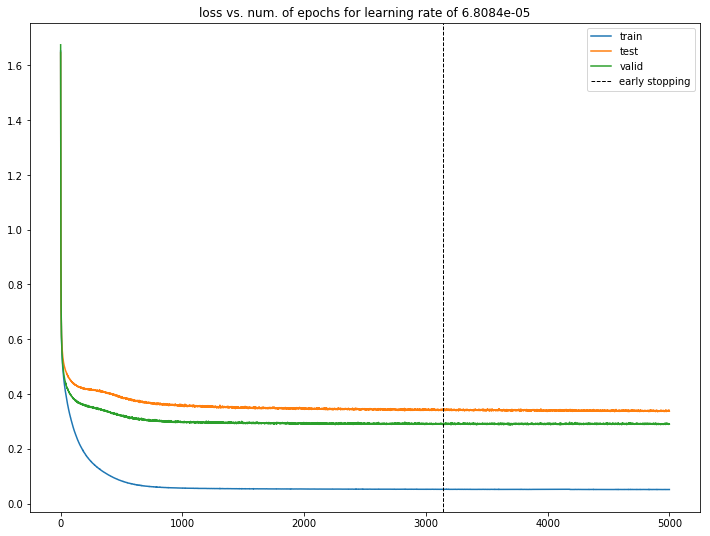

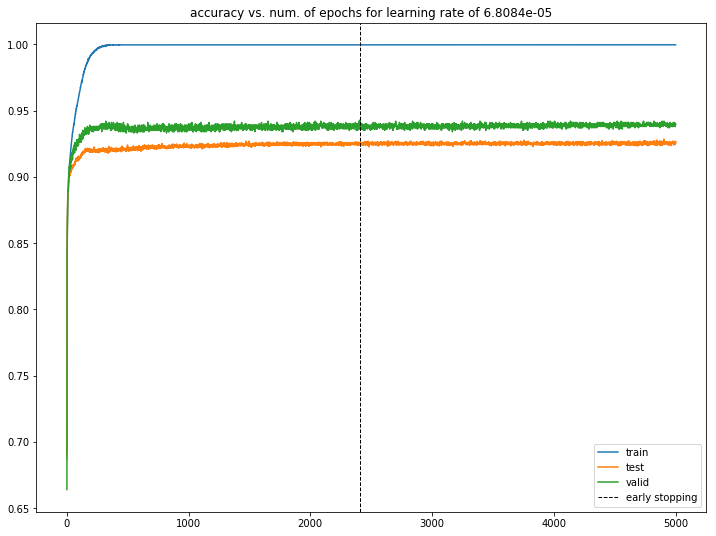

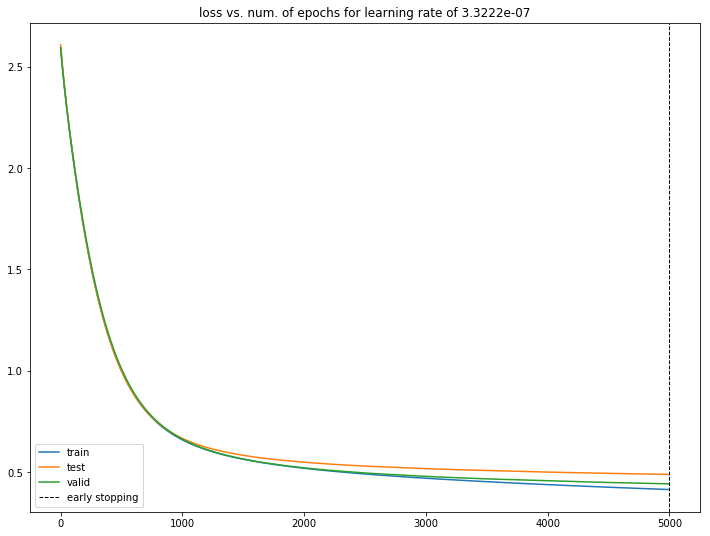

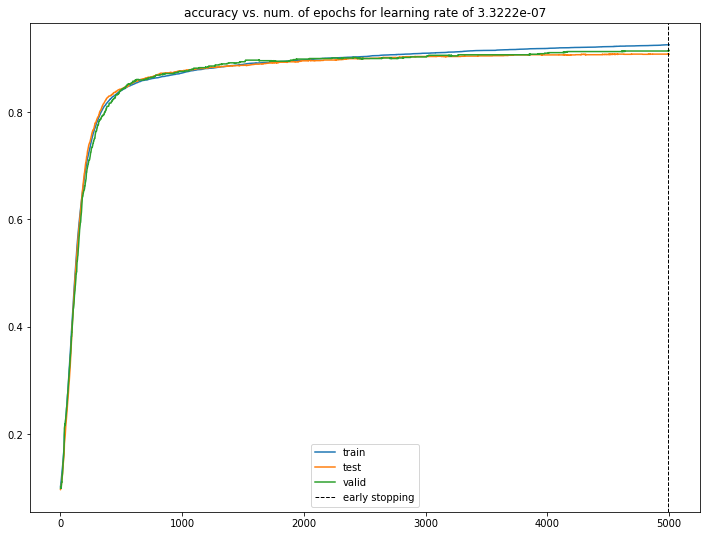

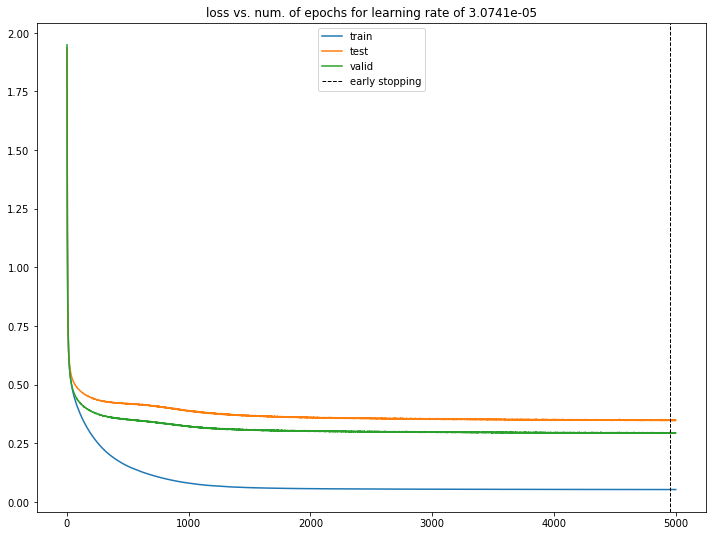

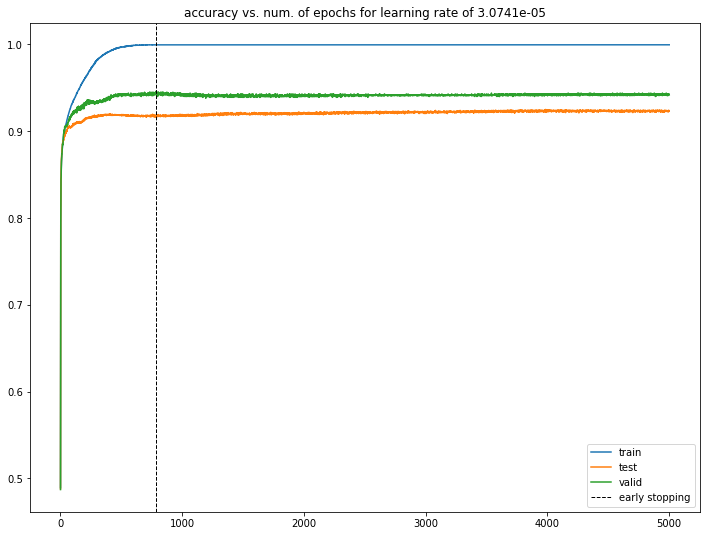

In [41]:
with tf.Session() as sess:
    for learning_rate in learning_rates:
        sess.run(init)
        valid_metrics = {'loss': [], 'accuracy': []}
        train_metrics = {'loss': [], 'accuracy': []}
        test_metrics = {'loss': [], 'accuracy': []}
        metrics = {'train': train_metrics, 'valid': valid_metrics, 'test': test_metrics}

        best_epoch = {'loss': 0, 'accuracy': 0}
        best_loss = float('inf')
        best_accuracy = 0
        epochs_since_best = 0
            
        print("Learning Rate: {} \n".format(learning_rate))
        for epoch in range(1,n_epochs+1):
            batches = grab_batches(trainData, trainTarget, batch_size)
            for X_batch, y_batch in batches:
                sess.run(training_step, feed_dict={X: X_batch, Y: y_batch, lr: learning_rate})

            train_loss, train_accuracy = sess.run([loss, accuracy], {X: trainData.reshape(-1,n_dim), Y: trainTarget})
            valid_loss, valid_accuracy = sess.run([loss, accuracy], {X: validData.reshape(-1,n_dim), Y: validTarget})
            test_loss, test_accuracy = sess.run([loss, accuracy], {X: testData.reshape(-1,n_dim), Y: testTarget})
            
            
            
            if valid_loss < best_loss:
                best_epoch['loss'] = epoch
                best_loss = valid_loss
            
            if valid_accuracy > best_accuracy:
                best_epoch['accuracy'] = epoch
                best_accuracy = valid_accuracy
                epochs_since_best = 0
            else:
                epochs_since_best += 1
            
            if epoch%10 == 0:
                print("Epoch: {}, Train Loss: {:.4}, Train Accuracy: {:.4}".format(epoch, train_loss, train_accuracy))
                print("Best Epoch: {}, Best Valid Loss: {:.4}, Best Valid Accuracy: {:.4} \n".format(best_epoch, best_loss, best_accuracy))
                
            metrics['train']['loss'].append(train_loss)
            metrics['train']['accuracy'].append(train_accuracy)
            metrics['valid']['loss'].append(valid_loss)
            metrics['valid']['accuracy'].append(valid_accuracy)
            metrics['test']['loss'].append(test_loss)
            metrics['test']['accuracy'].append(test_accuracy)
            
            if epoch < 20 and epochs_since_best > 15:
                print("Learning rate too high")
                break
        plot_metrics(learning_rate)
